<a href="https://colab.research.google.com/github/DhayuIntan/2141720026_PCVK_2023/blob/main/week-10/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Dhayu Intan Nareswari
# Kelas: TI-3H/10

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
pip install pytesseract

In [5]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di bawah.

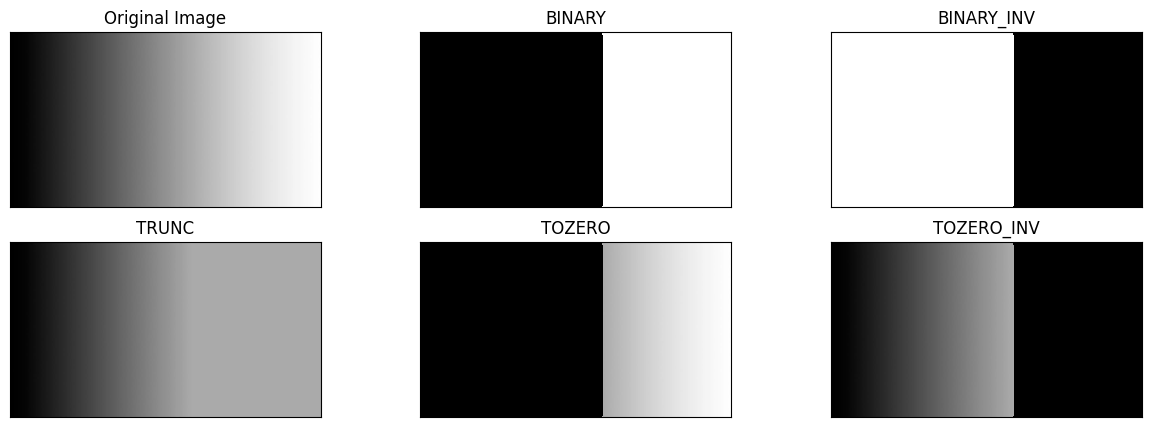

In [15]:
# Load the image
image_path = '/content/drive/MyDrive/Images/gradient.jpg'
img = Image.open(image_path)

# Convert the image to a NumPy array
img = np.array(img)

# Define the threshold value
thresh = 170

# Apply different thresholding methods
thresh1 = (img > thresh) * 255
thresh2 = (img <= thresh) * 255
thresh3 = np.where(img > thresh, thresh, img)
thresh4 = np.where(img > thresh, img, 0)
thresh5 = np.where(img > thresh, 0, img)

# Set up plot
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()


4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

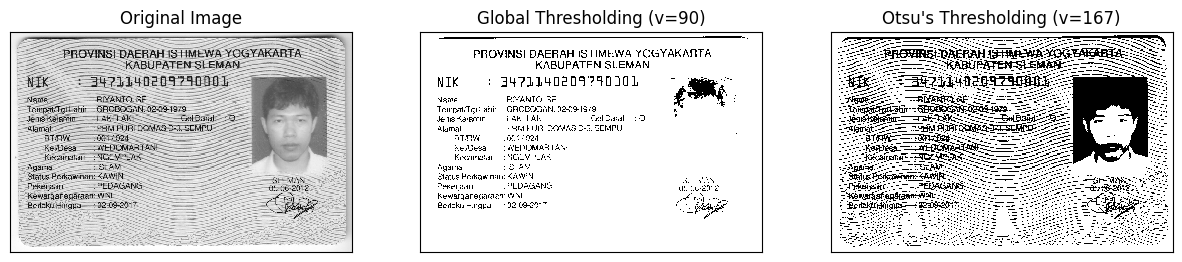

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = '/content/drive/MyDrive/Images/KTP_More/ktp.png'
img = Image.open(image_path)

# Convert the image to grayscale
img = img.convert('L')

# Convert the image to a NumPy array
img = np.array(img)

# Set the global threshold value
global_thresh = 90

# Set the Otsu's threshold value
otsu_thresh = 167

# Apply global thresholding
global_thresh_img = (img > global_thresh) * 255

# Apply Otsu's thresholding
otsu_thresh_img = (img > otsu_thresh) * 255

# Set up plot
titles = ['Original Image', f'Global Thresholding (v={global_thresh})', f"Otsu's Thresholding (v={otsu_thresh})"]
images = [img, global_thresh_img, otsu_thresh_img]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images. Petunjuk:

  a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.
  
  b. Buka link berikut https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html

  c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).



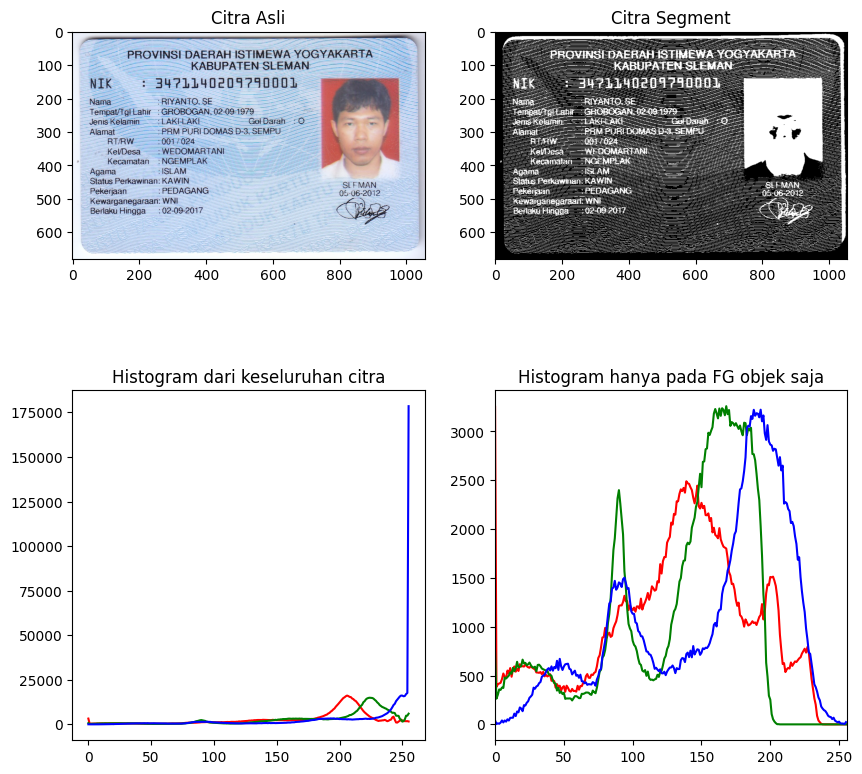

In [51]:
# Load the image
filename = '/content/drive/MyDrive/Images/KTP_More/ktp.png'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert image to RGB color space
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # Convert image to grayscale

# Apply threshold to create a mask for segmentation
ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Citra Asli')

# Segmented Image
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment')

# Define colors for the channels (red, green, blue)
color = ('r', 'g', 'b')

for i, col in enumerate(color):
    # Calculate histograms for the original image
    hist0 = cv.calcHist([img], [i], None, [256], [0, 256])

    # Plot histogram for the entire image
    plt.subplot(2, 2, 3)
    plt.plot(hist0, color=col)
    plt.title('Histogram dari keseluruhan citra')

    # Calculate histograms for the segmented image (foreground only)
    hist1 = cv.calcHist([img], [i], mask, [256], [0, 256])

    # Plot histogram for the foreground object only
    plt.subplot(2, 2, 4)
    plt.plot(hist1, color=col)
    plt.title('Histogram hanya pada FG objek saja')

    plt.xlim([0, 256])

plt.show()


6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

In [55]:
import cv2
import pandas as pd

(<Axes: >, <matplotlib.image.AxesImage at 0x7cbbbb02ead0>)

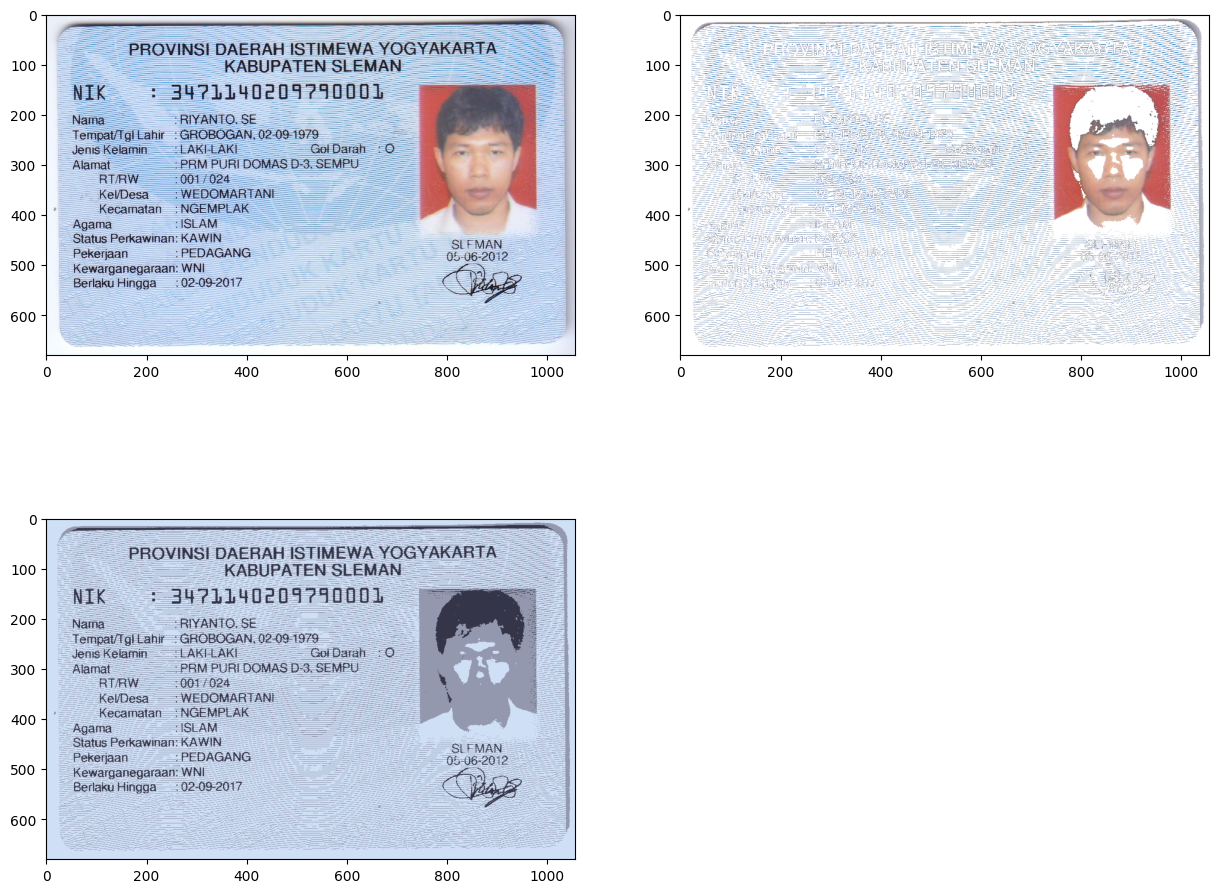

In [58]:
filename = ('/content/drive/MyDrive/Images/KTP_More/ktp.png')
img = cv2.imread(filename)
img = cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)

# reshape to 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 150, 0.1)

k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None,
criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert centroid points to integers
centers = np.uint8(centers)

# flattening array labels
labels = labels.flatten()

# convert the original pixel color to the color of each centroid
segmented_image = centers[labels.flatten()]

# reshape to the original image
segmented_image = segmented_image.reshape(img.shape)

# create a masked image model
masked_image = np.copy(img)
mask_img = masked_image.reshape((-1, 3))
mask_img[labels != 2] = [255, 255, 255]
mask_img = mask_img.reshape(img.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(mask_img)
plt.subplot(2,2,3),plt.imshow(segmented_image)

# Tugas
Tugasnya adalah mengimplementasikan thresholding dengan beberapa metode yang telah Anda ketahui untuk melakukan segmentasi pada dataset KTP pertemuan 7.

In [65]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (7,882 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

Pada tugas ini, pertama dilakukan K-Means clustering, lalu hasil K-Means diproses dengan Otsu’s Threshold, dan hasil Otsu's Threshold dikenali teksnya dengan pytesseract


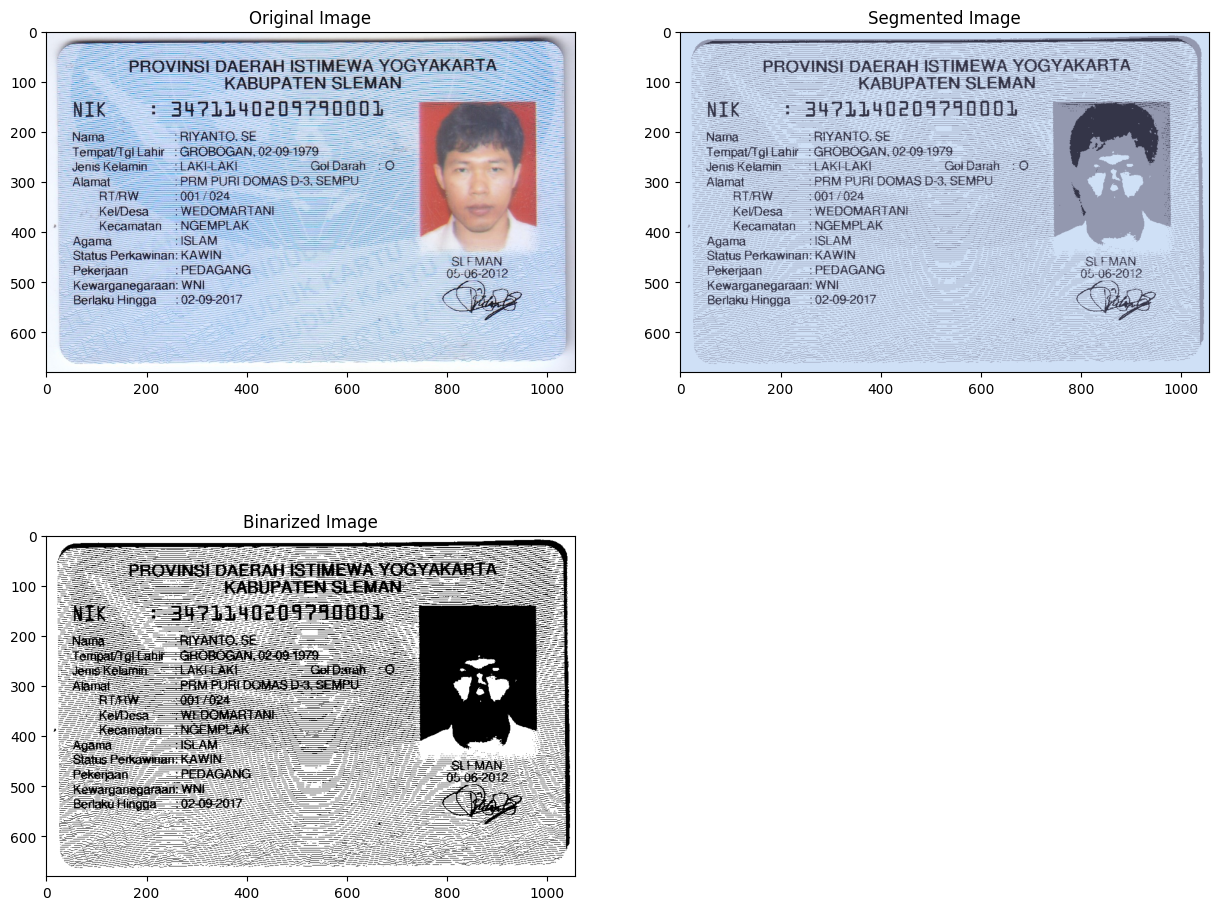

Extracted Text from ktp.png:
 




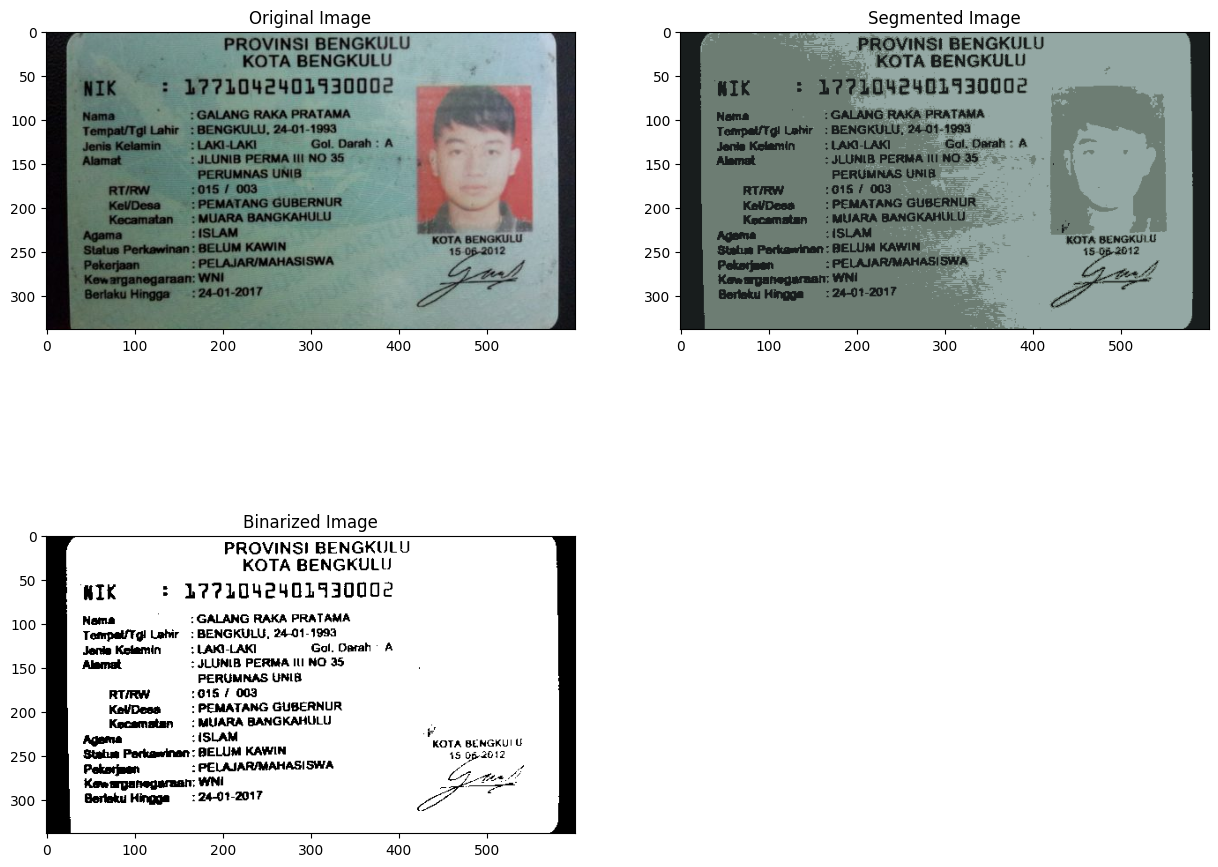

Extracted Text from ktp1.png:
PROVINS! BENGKULU
KOTA BENGKULU

WIK =: 4774042401930002
Nema = GALANG RAKA PRATAMA
TempalfTg! Labir : BENGKULU, 24-01-1993
Jone Kelamin 7 LAKI-LAKI Gol. Datah A
Alamat 7 JLUNLB PERMA Il NO 35.
PERUMNAS UNIB

RURW 1016 # 003

KelDesa TIPEMATANG GUBERNUR

Kecamatan : MUARA BANGKAHULU .
Sane Peckawinan: peu KAWIN “ora genous

PELAJAR/MAHASISWA $8 ppa0i2

Pokarjeen :
Kewmrpanegeraan: WNI
Beriaku Hingga = = 24-01-2017

Oe

tes




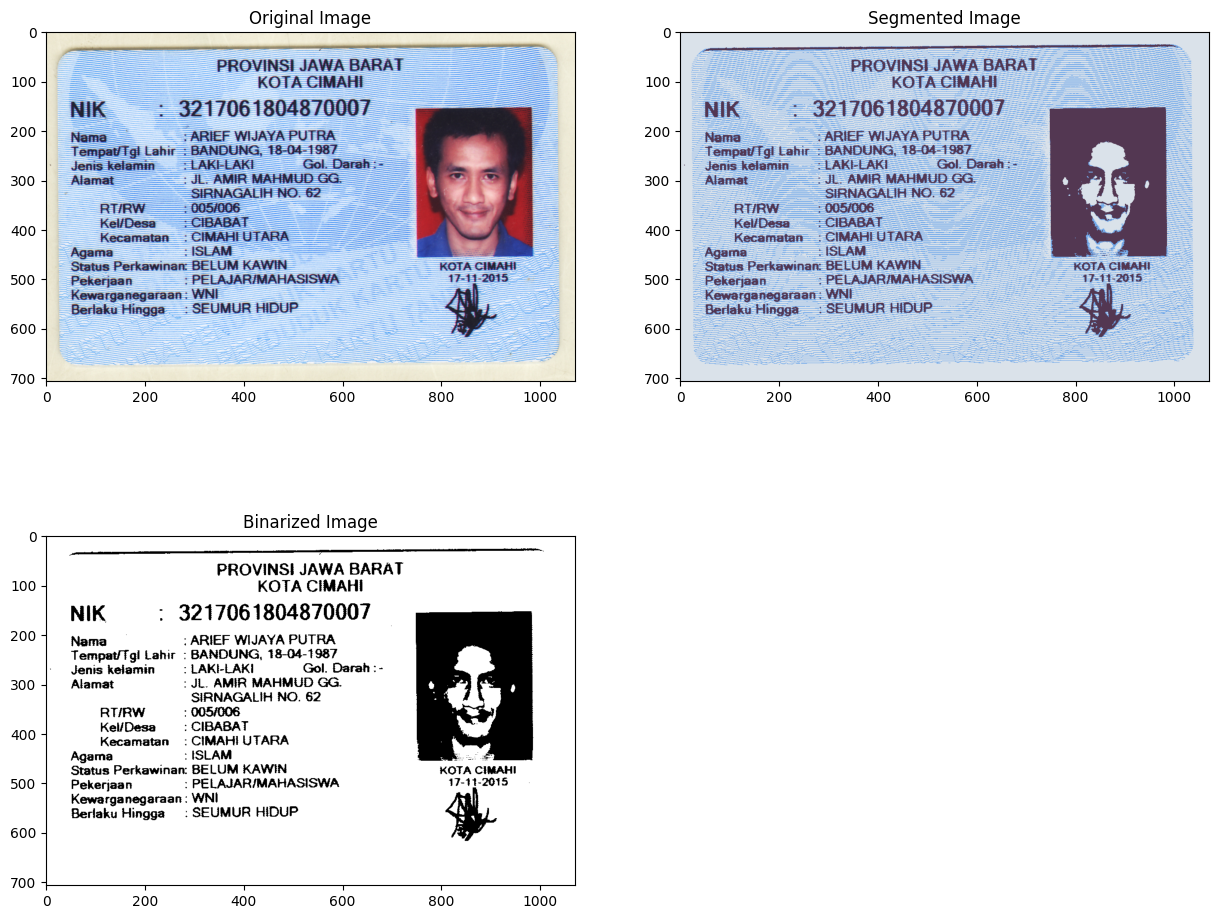

Extracted Text from ktp2.png:
a

PROVINSI JAWA BARAT

KOTA CIMAHI
NIK : 3217061804870007
Nama : ARIEF WIJAYA PUTRA
TemparTgi Lahir : BANDUNG, 18-04-1987
Jenis kelamin > LAKI-LAKI Gol. Darah : -
Alamat : JL. AMIR MAHMUD GG.
SIRNAGALIH NO. 62

RT/RW : 005/006
Kel/Desa : CIBABAT
Kecamatan < CIMAHI UTARA

   

Agama > ISLAM ee
Status Perkawinan: BELUM KAWIN KOTA CIMAHI
Pekerjaan >: PELAJAR/MAHASISWA 17-41-2015

Kewarganegaraan : WNI
Berlaku Hingga . SEUMUR HIDUP




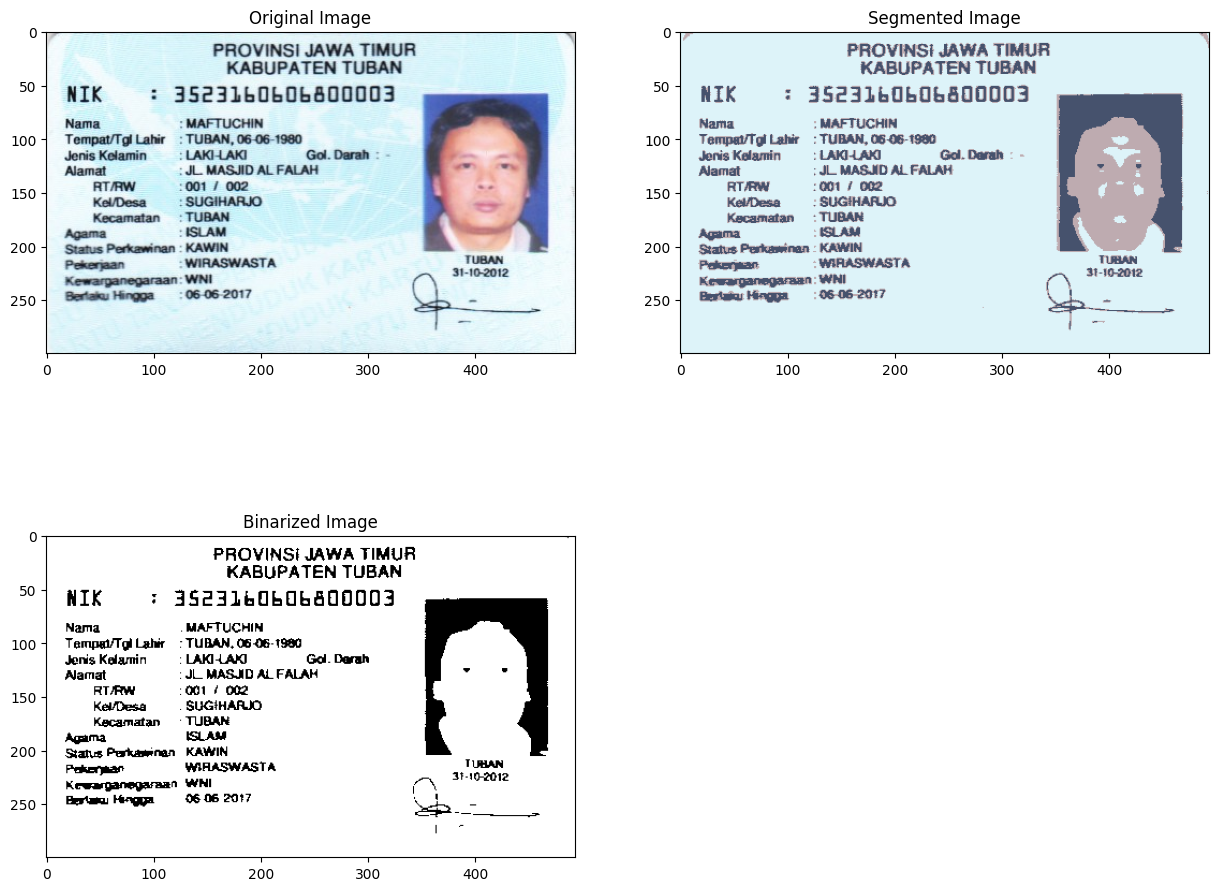

Extracted Text from ktp3.png:
PROVINS! JAWA TIMUR:

KABUPATEN TUBAN
NIK + 3923160b0b800003
Nama MAFTUCHIN
Tempan/Tgl Lahir > TUBAN, 06-06-1980
denis Kelamin LAK Gol. Darah
Namat JLMASUID AL FALAH vO
RURW 01 ¢ 002

Keliesa  SUGIHARIO
Kecamatan ~TUBAN
slaw

Agama
States Porkaninan KAWIN

WIRASWASTA TURAN
Poke can ne A siete

i
Bevin Hengga 06 06 2017 Lo
=P
1




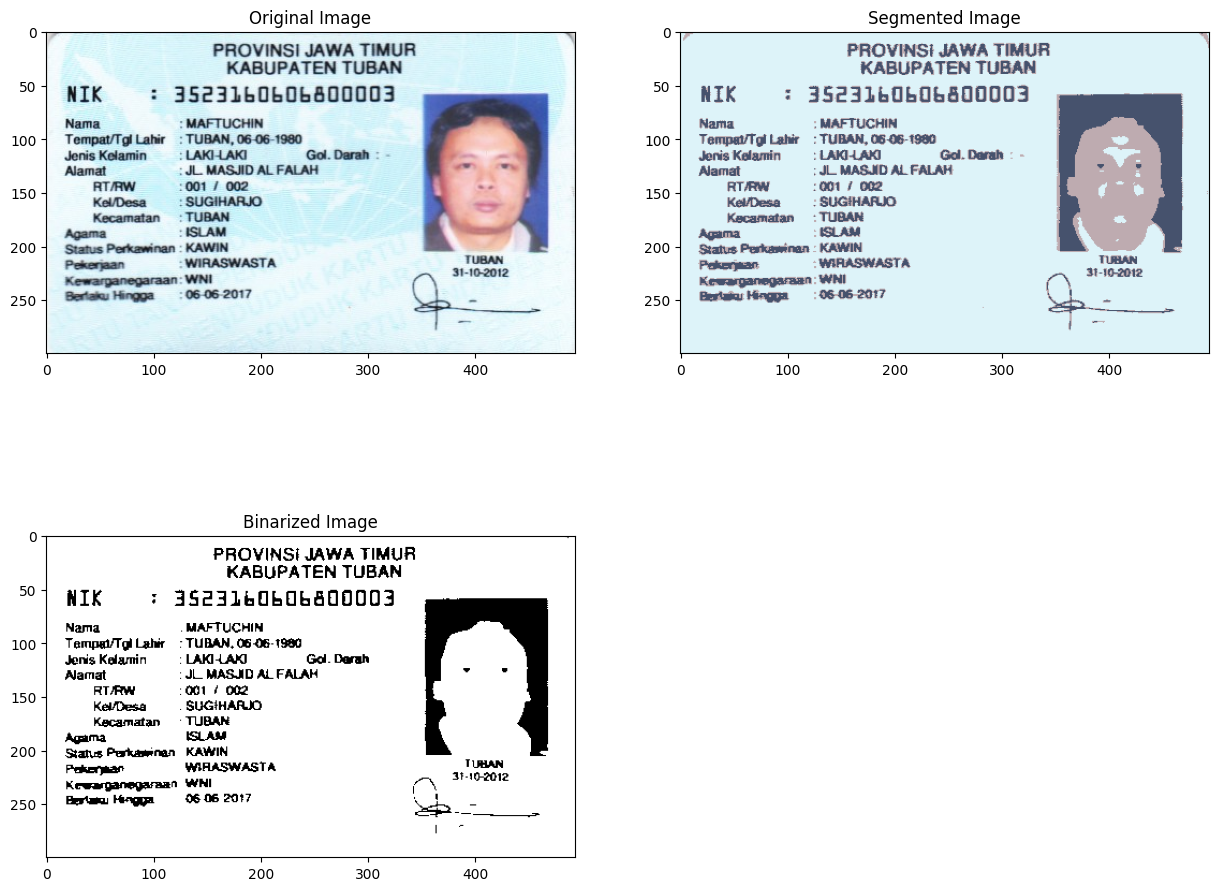

Extracted Text from ktp4.png:
PROVINS! JAWA TIMUR:

KABUPATEN TUBAN
NIK + 3923160b0b800003
Nama MAFTUCHIN
Tempan/Tgl Lahir > TUBAN, 06-06-1980
denis Kelamin LAK Gol. Darah
Namat JLMASUID AL FALAH vO
RURW 01 ¢ 002

Keliesa  SUGIHARIO
Kecamatan ~TUBAN
slaw

Agama
States Porkaninan KAWIN

WIRASWASTA TURAN
Poke can ne A siete

i
Bevin Hengga 06 06 2017 Lo
=P
1




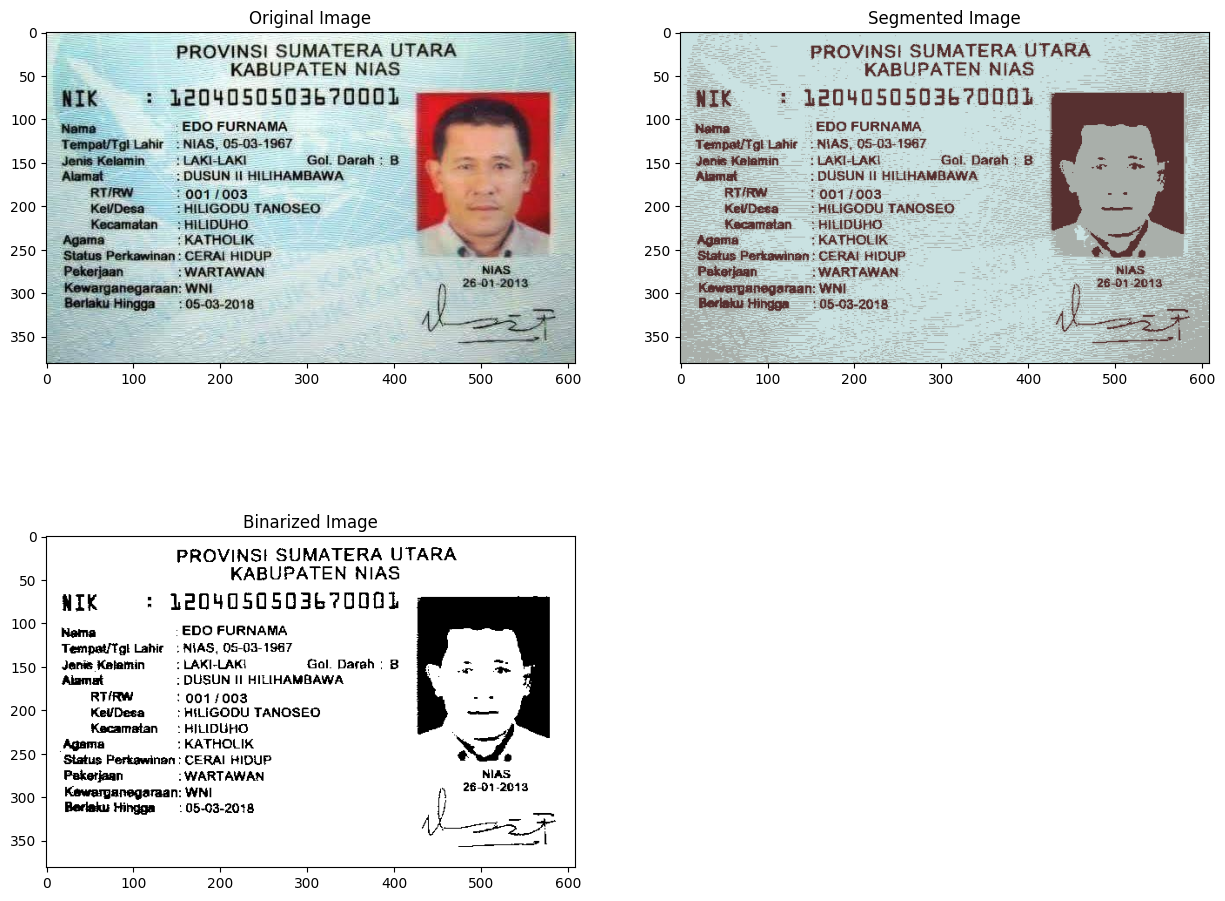

Extracted Text from ktp5.png:
NIK : 1204050503670001

Nama
Tempat/T gt Lahie
Jenis Kajamin
Alamat
RTRW
KeUDesa
Kecamatan
Agama

Pekerjaan

Beriaku: Hingga

:LAKI-LAKL Gol. Darah : B
: DUSUN II HILIHAMBAWA
£001 /003

2 HILIDUHO
: KATHOLIK
‘Status Perkawinan :

PROVINS! SUMATERA UTARA
KABUPATEN NIAS

EDO FURNAMA
i NIAS, 05-03-1967

: HILIGODU TANOSEO

 

CERAI HIDUP

i WARTAWAN NIAS-
Kewarganegaraan:

WNI 28-01-2013
05-03-2018 I

i BA

ie




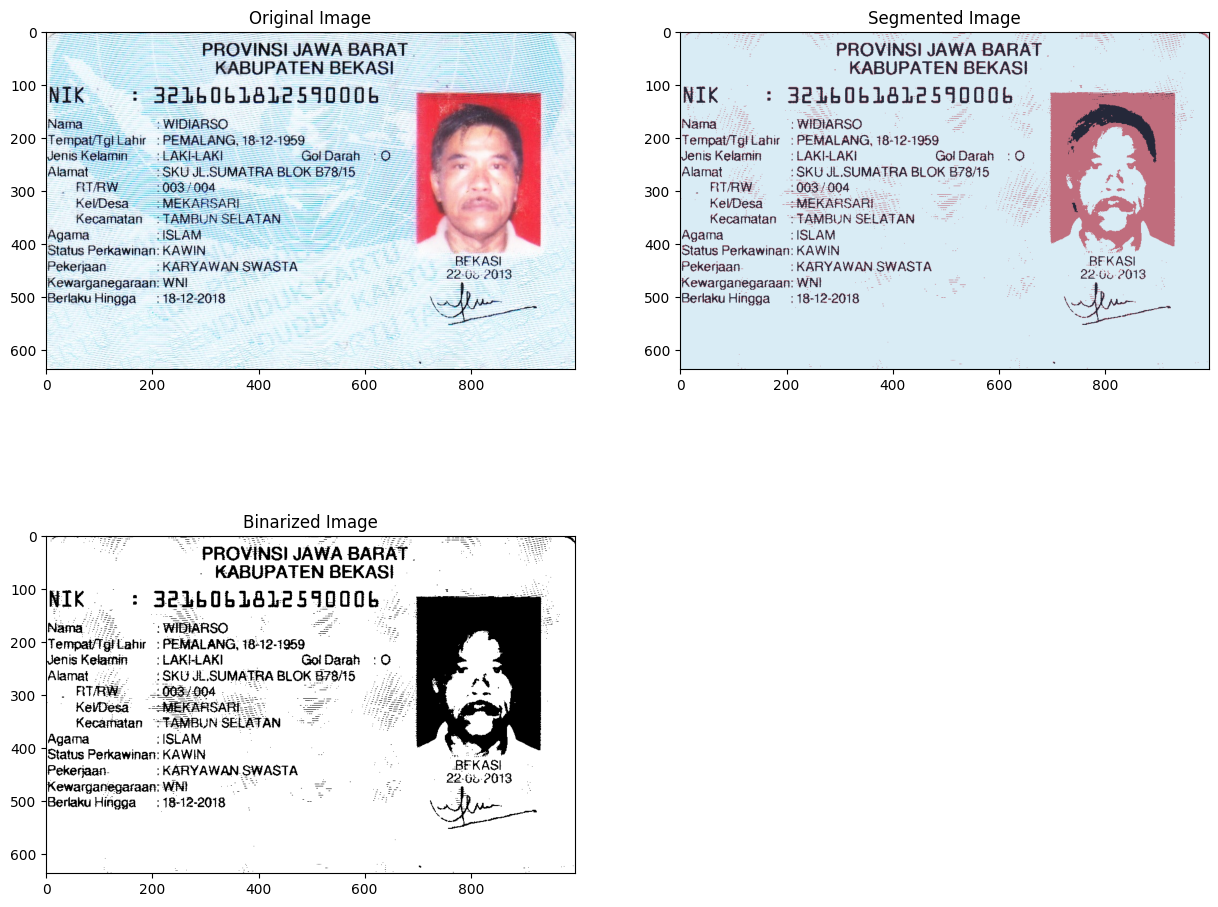

Extracted Text from ktp6.png:
 

     

~ PROVINSI JAWA BAR
KABUPATEN BEKASI

323606141257000b.

   

: PEMALANG, 18-12-1959
Jenis Kelamin : LAKI-LAKI Gol Darah
: :SKU JL.SUMATRA BLOK 878/15

   

Kecamatan ©

Agama ISLAM
Status Perkawinan: KAWIN
Pekerjaan- :KARYAWAN. SWASTA

Kewarganegaraan: WNI a =_
Berlaku Hingga =: 18-12-2018 -

  

 

 

   

BEKASI
22-08 2013

 




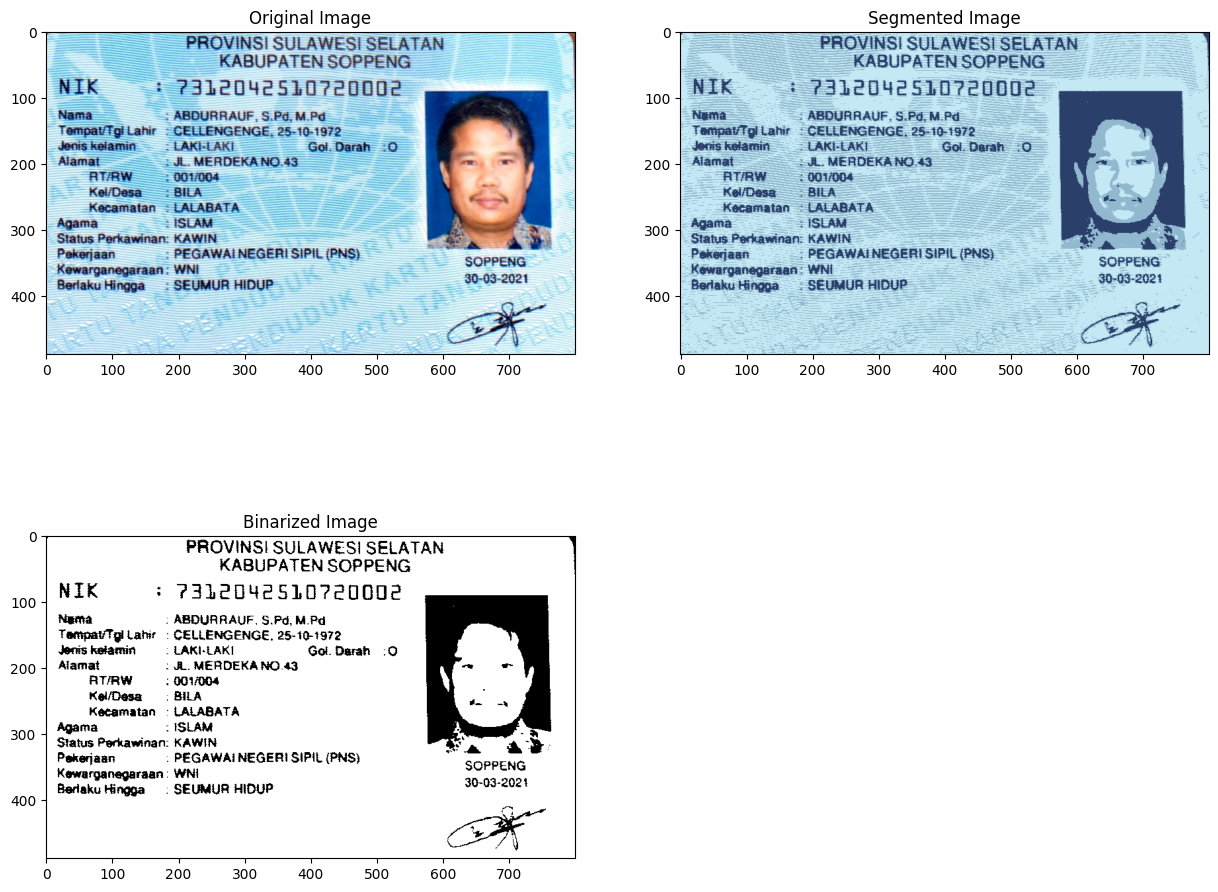

Extracted Text from KTP7.jpeg:
PROVINS! SULAWESI SELATAN

KABUPATEN SOPPENG
NIK + 93420425107? e000c
Nema : ABDURRAUF, S.Pd, MPa
Tempat/TglLahir : CELLENGENGE, 25-10-1972
Joniskelamin —< LAKI-LAKI Gol. Darah:
Alamat 2 BL. MERDEKA NO.43
RTRW 001/004

Kel/Desa_, BILA
Ketamatan - LALABATA

   

Agama 2 ISLAM 4 ae
Status Perkawinan: KAWIN . av
Pekerjaan : PEGAWAI NEGER! SIPIL (PNS) SOPPENG
Kewarganegaraan: WNi 30-03-2021

Beraku Hingga «=. SEUMUR HIDUP




In [80]:
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt
import os

# Path to the folder containing KTP images
ktp_folder = '/content/drive/MyDrive/Images/KTP_More'

# List all image files in the folder
ktp_images = [f for f in os.listdir(ktp_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

for ktp_image_file in ktp_images:
    ktp_image_path = os.path.join(ktp_folder, ktp_image_file)

    # Load the KTP image
    img = cv2.imread(ktp_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Reshape the image to 2D
    pixel_values = img.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # K-Means clustering
    k = 3
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 150, 0.1)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    labels = labels.flatten()
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(img.shape)

    # Convert to grayscale
    gray_image = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2GRAY)

    # Apply Otsu's Threshold
    _, binarized_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Perform OCR on the binarized image using Pytesseract
    extracted_text = pytesseract.image_to_string(binarized_image)

    # Display the original image, segmented image, and binarized image
    plt.figure(figsize=(15, 12))
    plt.subplot(2, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")

    plt.subplot(2, 2, 2)
    plt.imshow(segmented_image)
    plt.title("Segmented Image")

    plt.subplot(2, 2, 3)
    plt.imshow(binarized_image, cmap='gray')
    plt.title("Binarized Image")

    plt.show()

    # Print the extracted text
    print(f'Extracted Text from {ktp_image_file}:\n{extracted_text}\n')
